# Exploratory Data Analysis

### Importing libreries

In [1]:
import pandas as pd
import numpy as np
# To work with json
import json
# for encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

# Visualization libraries
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# To do exploratory data analysis
import seaborn as sns
from wordcloud import WordCloud

# Stile for plots
plt.style.use('ggplot')

### Loading the data set

In [2]:
# to import the data from the json file to a dataframe
with open ('/home/bbruno/all_here/python course/vinnie/data/users-data-prod.json', 'r') as file:
    data = json.load(file)

df = pd.json_normalize(data['usersData'])
df.columns

Index(['userId', 'wines', 'tastingNotes', 'pairings'], dtype='object')

### Data understanding

In [3]:
print(f"1. the data set is compoused of {df.shape[0]} rows and {df.shape[1]} columns\n") #this is df.shape
print(f"2. the data set if of type {type(df)}\n")
print(f"3. the columns are of type \n{df.dtypes}")

1. the data set is compoused of 4504 rows and 4 columns

2. the data set if of type <class 'pandas.core.frame.DataFrame'>

3. the columns are of type 
userId          object
wines           object
tastingNotes    object
pairings        object
dtype: object


## Data preparation

* In this section we would have the data preparation based on the feedback of the wines: This feedback is provided by the users when they try a given wine and they rather liked or not based in a numerical rate from 0 to 5 stars

In [4]:
wines = []
for user_data in data['usersData']:
    for wine in user_data['wines']:
        #for grape in wine['grapes']:
        for tasteNoteid in wine['tasteNoteIds']:
            wines.append({
                'userId': user_data['userId'],
                'wine': wine['name'],
                'wineId': wine['id'],
                'color': wine['color'],
                
                'grapes': wine['grapes'],
                #'grapes': grapes,
                'appellation': wine['appellation'],
                'category': wine['category'],
                #'tasteNoteid': wine['tasteNoteIds'],
                'tastingNoteIds': tasteNoteid
            })

wines_df = pd.DataFrame(wines)
wines_df['grapes'] = wines_df['grapes'].apply(str)
wines_df['grapes'] = wines_df['grapes'].str.replace('\[', '', regex=True)
wines_df['grapes'] = wines_df['grapes'].str.replace('\]', '', regex=True)
wines_df['grapes'] = wines_df['grapes'].str.replace("'", "")
wines_df['grapes'] = wines_df['grapes'].replace('', np.nan)
wines_df = wines_df.replace('None', np.nan)
print(wines_df.shape)
wines_df

(1271, 8)


,userId,wine,wineId,color,grapes,appellation,category,tastingNoteIds
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,6V7XZnXSK2LYF9jzI7LR,Red,Barbera,Emilia-Romagna,MediumRed,roCWZ72rDDLT6Q5Mcc7m
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,bINBmCq7FXjVXt1sj6f8,Red,Shiraz/Syrah,South Eastern Australia,BoldRed,XJ60d8BLy1YOzcr7no1J
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,ckVI0IUPCHuhT00plzm2,Red,Pinot Noir,Sonoma Coast,LightRed,4Buw0MdNDOZ4tCSRw88d
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,3s8PZXoVIaInrJqMbxs5,White,Timorasso,Colli Tortonesi,None,UUpZSMTF7VZVDPX17pgw
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,B1VJSCml6AZ47Hf8SpEu,Red,"Cabernet Sauvignon, Sangiovese",Toscana,None,DCTkjJunOye0y3nrg8ul
...,...,...,...,...,...,...,...,...
1266,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,bPkjkqyHCazKNY1YBN8N,White,Albariño,Rías Baixas,LightWhite,vbInbkGi5vgFpJw7uO3o
1267,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Piceno Bacchus,waRUqzj7zJFnvZE6ZzlA,Red,"Pinot Noir, Sangiovese, Montepulciano",Rosso Piceno,None,OC1bFth3SPBkFNRKIvW5
1268,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,y1CVSKNcIV3reYGh00YA,White,Albariño,Rías Baixas,LightWhite,TN52mXAU59Bb1dppnVa7
1269,be0e69e3-30d5-4e21-b62f-05402fbfcd5a,Albariño,y1CVSKNcIV3reYGh00YA,White,Albariño,Rías Baixas,LightWhite,sMkSAMC1wkpEcdypKDbR


In [5]:
# From the tastingNotes list takes
tastingNotes = []
for user_data in data['usersData']:
    for tastingNote in user_data['tastingNotes']:
        #for aroma in tastingNote['aromaKeys']:

        tastingNotes.append({

            'id': tastingNote['id'], #this is the same 
            'wineId': tastingNote['wineId'],
            'rate': tastingNote['rate'],  
            'aromaKeys': tastingNote['aromaKeys'],
            'sweetness': tastingNote['sweetness'],
            'body': tastingNote['body'],
            'intensity': tastingNote['intensity'],
            'acidity': tastingNote['acidity'],
            'depth': tastingNote['depth'],
            'clarity': tastingNote['clarity'],
            'vintage': tastingNote['vintage'],
            'hue': tastingNote['hue'],
            'tannins': tastingNote['tannins']
    })

tastingNotes_df = pd.DataFrame(tastingNotes)

tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].apply(str)
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].str.replace('\[', '', regex=True)
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].str.replace('\]', '', regex=True)
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].str.replace("'", "")
#remove the word aroma at the beginning of each word
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].str.replace("aroma-", "")
# add 0 to the vintage column where there is no value
tastingNotes_df['vintage'] = tastingNotes_df['vintage'].fillna(0)
tastingNotes_df = tastingNotes_df.astype({'vintage': 'int'})
# replace the 0 with null
tastingNotes_df['vintage'] = tastingNotes_df['vintage'].replace(0, np.nan)
# replace the empty strings with null
tastingNotes_df['aromaKeys'] = tastingNotes_df['aromaKeys'].replace('', np.nan)

# replace the None with null
tastingNotes_df = tastingNotes_df.replace('None', np.nan)

tastingNotes_df

,id,wineId,rate,aromaKeys,sweetness,body,intensity,acidity,depth,clarity,vintage,hue,tannins
0,roCWZ72rDDLT6Q5Mcc7m,6V7XZnXSK2LYF9jzI7LR,5,NaN,Medium Sweet,Full Bodied,Aromatic,Crisp,Dark,Clear,2020.0,Purplish,Not Present
1,4Buw0MdNDOZ4tCSRw88d,ckVI0IUPCHuhT00plzm2,3,"red-cherry, lime, saffron, cinnamon, vinegar, ...",Dry,Light,Moderate,Crisp,Medium,Clear,2021.0,Ruby,Round
2,XJ60d8BLy1YOzcr7no1J,bINBmCq7FXjVXt1sj6f8,2,"red-cherry, grape, tomato, tea, cream",Medium Sweet,Very Light,Low,Crisp,Pale,Clear,2021.0,Ruby,Soft
3,6IZXzo1sW9nfRKqTwjyE,HlIyRipAHSVlgbS0v5U4,5,"plum, cherry, black-cherry, pepper",Dry,Medium Full,Aromatic,Fresh,Medium,Slight Haze,2019.0,Ruby,Soft
4,DCTkjJunOye0y3nrg8ul,B1VJSCml6AZ47Hf8SpEu,4,"cherry, strawberry, blackberry, olive",Dry,Medium Full,Aromatic,Fresh,Medium,Slight Haze,2011.0,Purplish,Round
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,TYm9LrS9xTWKydT7sagy,BDh13yLzIHRkUoWTf3G1,4,"orange, lemon, green-tea",Dry,Light,Aromatic,Crisp,None,Slight Haze,2016.0,Gold,None
1286,Uvn6Tc35fswkLuXxDpjW,RfoyWKd0DiwubO2FljfW,None,NaN,None,None,None,Fresh,None,Slight Haze,NaN,None,Dry Tannins
1287,nURhuPeJ7wQtg0eTyWki,aiYJGI8M8ka2U6vKawuB,4,NaN,None,None,None,None,None,Slight Haze,NaN,Gold,None
1288,sMkSAMC1wkpEcdypKDbR,y1CVSKNcIV3reYGh00YA,None,NaN,None,None,None,Flabby,None,None,NaN,None,None


## Merging

In [6]:
merged_df = pd.merge(wines_df, tastingNotes_df, left_on='tastingNoteIds', right_on='id')
#show all the columns
pd.set_option('display.max_columns', None)

#print the columns 
print(merged_df.columns)
print(merged_df.head(5))

Index(['userId', 'wine', 'wineId_x', 'color', 'grapes', 'appellation',
       'category', 'tastingNoteIds', 'id', 'wineId_y', 'rate', 'aromaKeys',
       'sweetness', 'body', 'intensity', 'acidity', 'depth', 'clarity',
       'vintage', 'hue', 'tannins'],
      dtype='object')
                                 userId                       wine  \
0  826c6abe-7147-4b69-aaea-275fe65b033a  Cavalcaonte Barbera Forlí   
1  d838a526-4b0a-4fad-b54f-90b6ca321fca                     Shiraz   
2  d838a526-4b0a-4fad-b54f-90b6ca321fca                 Pinot Noir   
3  bec96c0b-5b0b-4992-8756-e0d3b704afb5                  Timorasso   
4  bec96c0b-5b0b-4992-8756-e0d3b704afb5                  Le Difese   

               wineId_x  color                          grapes  \
0  6V7XZnXSK2LYF9jzI7LR    Red                         Barbera   
1  bINBmCq7FXjVXt1sj6f8    Red                    Shiraz/Syrah   
2  ckVI0IUPCHuhT00plzm2    Red                      Pinot Noir   
3  3s8PZXoVIaInrJqMbxs5  White       

## Data cleaning

In [7]:
print(merged_df.info())
print(f"the data has the following colums with null values:\n{merged_df.isnull().sum()}")
# the only important column with null values is 'rate' which is the target variable

# Drop the rows with null values in the target variable
merged_df.dropna(subset=['rate'], inplace=True)
print(f"1. the number of null values in the column 'rate' after dropping are {merged_df['rate'].isnull().sum()}")

# Drop the columns that are not important for the analysis
merged_df.drop(['wineId_x', 'tastingNoteIds', 'id', 'wineId_y'], axis=1, inplace=True)
merged_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 0 to 1268
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userId          1269 non-null   object 
 1   wine            1269 non-null   object 
 2   wineId_x        1269 non-null   object 
 3   color           1269 non-null   object 
 4   grapes          959 non-null    object 
 5   appellation     832 non-null    object 
 6   category        575 non-null    object 
 7   tastingNoteIds  1269 non-null   object 
 8   id              1269 non-null   object 
 9   wineId_y        1269 non-null   object 
 10  rate            1008 non-null   object 
 11  aromaKeys       591 non-null    object 
 12  sweetness       994 non-null    object 
 13  body            966 non-null    object 
 14  intensity       1037 non-null   object 
 15  acidity         1010 non-null   object 
 16  depth           961 non-null    object 
 17  clarity         1025 non-null   o

,userId,wine,color,grapes,appellation,category,rate,aromaKeys,sweetness,body,intensity,acidity,depth,clarity,vintage,hue,tannins
0,826c6abe-7147-4b69-aaea-275fe65b033a,Cavalcaonte Barbera Forlí,Red,Barbera,Emilia-Romagna,MediumRed,5,NaN,Medium Sweet,Full Bodied,Aromatic,Crisp,Dark,Clear,2020.0,Purplish,Not Present
1,d838a526-4b0a-4fad-b54f-90b6ca321fca,Shiraz,Red,Shiraz/Syrah,South Eastern Australia,BoldRed,2,"red-cherry, grape, tomato, tea, cream",Medium Sweet,Very Light,Low,Crisp,Pale,Clear,2021.0,Ruby,Soft
2,d838a526-4b0a-4fad-b54f-90b6ca321fca,Pinot Noir,Red,Pinot Noir,Sonoma Coast,LightRed,3,"red-cherry, lime, saffron, cinnamon, vinegar, ...",Dry,Light,Moderate,Crisp,Medium,Clear,2021.0,Ruby,Round
3,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Timorasso,White,Timorasso,Colli Tortonesi,None,5,"eucalyptus, thyme, flint, pepper, honey, dried...",Medium Sweet,Medium Full,Aromatic,Fresh,None,Clear,2019.0,Gold,Not Present
4,bec96c0b-5b0b-4992-8756-e0d3b704afb5,Le Difese,Red,"Cabernet Sauvignon, Sangiovese",Toscana,None,4,"cherry, strawberry, blackberry, olive",Dry,Medium Full,Aromatic,Fresh,Medium,Slight Haze,2011.0,Purplish,Round


In [8]:
print(merged_df.info())
print(f"1. the number of users in the data set is {merged_df['userId'].nunique()}\n")
print(f"2. the number of wines in the data set is {merged_df['wine'].nunique()}\n")
print(f"3. the total number of rates is {merged_df['rate'].count()}\n")
print(f"4. the type of rate was {merged_df['rate'].unique()}\n")
# mapping the rate to int only
merged_df['rate'] = merged_df['rate'].astype(int)
print(f"4. the type of rate is {merged_df['rate'].unique()}\n")
print(f"5. the top 10 wines with the most rates are:\n{merged_df['wine'].value_counts().head(10)}\n")
print(f"6. the number of rates per type are \n{merged_df['rate'].value_counts().sort_index()}\n")
print(f"7. the top 10 users with the most rates are:\n{merged_df['userId'].value_counts().head(10)}\n")
print(f"8. the rates per wines color are:\n{merged_df['color'].value_counts()}\n")
print(f"9. the percentage of users that perfer wines by colors:\n{merged_df['color'].value_counts(normalize=True)}\n")
# drop the null rows of grapes, appellations and categories
merged_df_gac = merged_df.dropna(subset=['grapes', 'appellation', 'category'])
print(f"10. the most populars appellations are:\n{merged_df_gac['appellation'].value_counts().head(10)}\n")
print(f"11. the most populars categories are:\n{merged_df_gac['category'].value_counts().head(10)}\n")
print(f"12. the most populars grapes are:\n{merged_df_gac['grapes'].value_counts().head(10)}\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1265
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       1008 non-null   object 
 1   wine         1008 non-null   object 
 2   color        1008 non-null   object 
 3   grapes       764 non-null    object 
 4   appellation  634 non-null    object 
 5   category     413 non-null    object 
 6   rate         1008 non-null   object 
 7   aromaKeys    459 non-null    object 
 8   sweetness    842 non-null    object 
 9   body         826 non-null    object 
 10  intensity    865 non-null    object 
 11  acidity      855 non-null    object 
 12  depth        806 non-null    object 
 13  clarity      851 non-null    object 
 14  vintage      706 non-null    float64
 15  hue          846 non-null    object 
 16  tannins      798 non-null    object 
dtypes: float64(1), object(16)
memory usage: 141.8+ KB
None
1. the number of users in the data 

* plot to check missing values


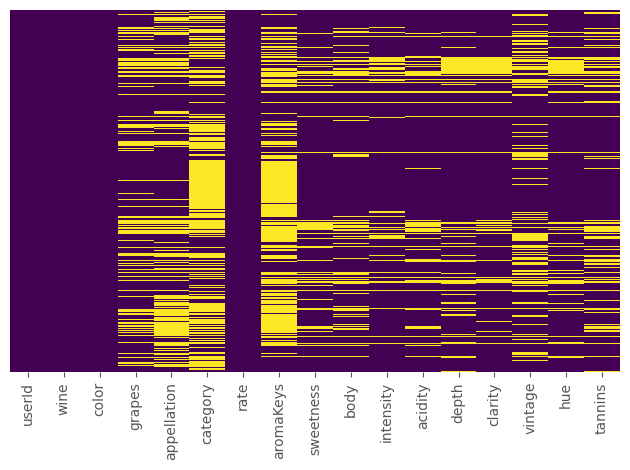

In [9]:
# Dataset has not missing values in important columns for analysis
sns.heatmap(merged_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
#save
plt.tight_layout()
plt.savefig('/home/bbruno/all_here/python course/vinnie/img/heatmap2.png', dpi=300, bbox_inches='tight')

## Handling Imbalanced Data
* First method: **Undersampling**

<img src="/home/bbruno/all_here/python course/vinnie/src/undersampling_example.png" alt="alt text" width="40%" height="auto" class="blog-image">

the number of rate per user in the downsampled data set is 20


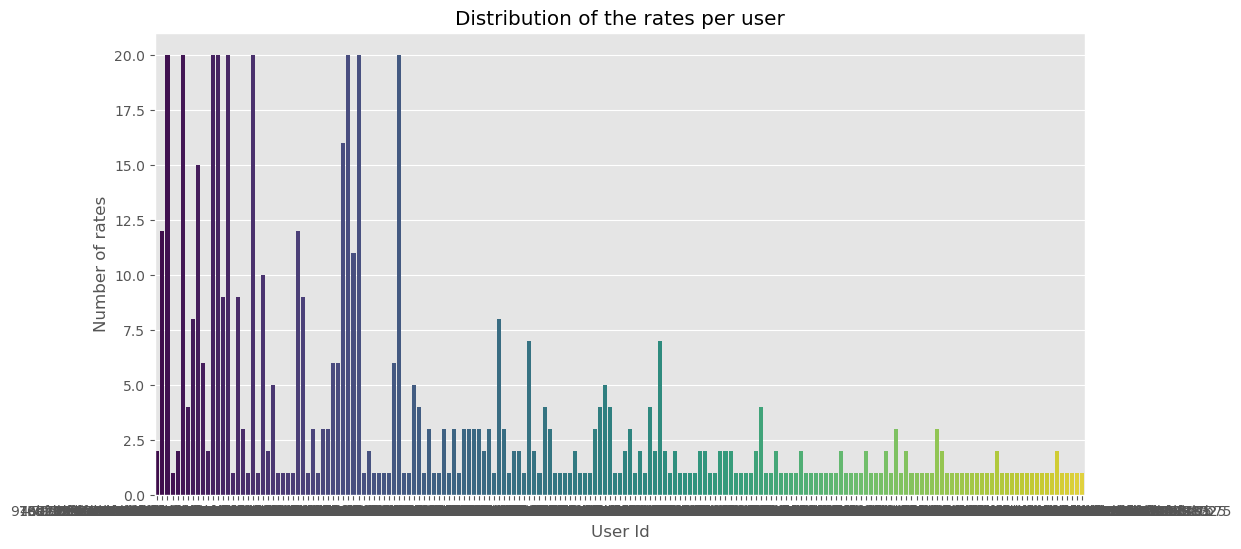

### The distribution of the rates has been rebalanced from the original data set to a maximum of 20 rates per user ###

1. the top 10 users with the most rates are:
bc79b0e3-064d-4240-86de-e86499f577e8    20
f8c400a6-ded1-40b8-95d2-a263d05c30ce    20
13016d41-00bd-411c-83f5-2b95691696b7    20
ecc462e1-5041-43ca-94c3-c2bfc9b3215e    20
7f6dede6-b8b5-4bb6-a1ca-ae58c79c0ea7    20
91cf68cc-9436-43e1-871d-33beef4d2337    20
5ccd8030-047b-432c-a630-d784ab415756    20
2a62eecd-b0cd-4395-9f8c-7c912a208be2    20
36fec3ea-e183-491d-b65a-6c7ac90fafa5    20
76b71bb0-6cc9-4168-8a45-bbafc1e9a256    16
Name: userId, dtype: int64

2. the number of users in the downsampled data set is '185' the same as for the original data set



In [10]:
# Clean the data set for user, wine and rate
df_user_wine_rate = merged_df[['userId', 'wine', 'rate']]

# Downsample majority class
from sklearn.utils import resample

# Specify the maximum number of rating per user
max_rate_per_user= 20

# count the number of rates per user
user_rating_count = df_user_wine_rate['userId'].value_counts()

# select the users with more than 20 rates
excessive_users = user_rating_count[user_rating_count > max_rate_per_user].index

# separate the majority and minority classes
df_majority = df_user_wine_rate[df_user_wine_rate['userId'].isin(excessive_users)]
df_minority = df_user_wine_rate[~df_user_wine_rate['userId'].isin(excessive_users)]

# Downsample each user in the majority class individually
downsampled_majority = pd.concat([resample(df_majority[df_majority['userId'] == user], 
                                           replace=False, 
                                           n_samples=max_rate_per_user, 
                                           random_state=42) 
                                  for user in excessive_users])

# Combine minority class with downsampled majority class
downsampled_df = pd.concat([downsampled_majority, df_minority])

#shuffle the data set to ensure randomness
downsampled_df = downsampled_df.sample(frac=1, random_state=42)

#train test split
X = downsampled_df.drop('rate', axis=1)
y = downsampled_df['rate']

#split the data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)
#save
X_train.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/undersampling_1/X_train.csv', index=False)
X_test.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/undersampling_1/X_test.csv', index=False)
y_train.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/undersampling_1/y_train.csv', index=False)
y_test.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/undersampling_1/y_test.csv', index=False)


# Display new class counts
downsampled_df['userId'].value_counts()

print(f"the number of rate per user in the downsampled data set is {downsampled_df['userId'].value_counts().max()}")

#plot the distribution of the rates per user
plt.figure(figsize=(12,6))
sns.countplot(x='userId', data=downsampled_df, palette='viridis')
plt.title('Distribution of the rates per user')
plt.xlabel('User Id')
plt.ylabel('Number of rates')
plt.show()

print("### The distribution of the rates has been rebalanced from the original data set to a maximum of 20 rates per user ###\n")
print(f"1. the top 10 users with the most rates are:\n{downsampled_df['userId'].value_counts().head(10)}\n")
print(f"2. the number of users in the downsampled data set is '{downsampled_df['userId'].nunique()}' the same as for the original data set\n")

In [11]:
#rename the data set
downsampled_df_random = downsampled_df
#save the downsampled data set
downsampled_df.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/downsampled_df_random.csv', index=False)

* undersample approach 2 (manually by rates and not by users as above)

In [12]:
# Clean the data set for user, wine and rate
df_user_wine_rate = merged_df[['userId', 'wine', 'rate']]

# # class count for rate
count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = df_user_wine_rate.rate.value_counts().sort_index()
print(count_class_1, count_class_2, count_class_3, count_class_4, count_class_5)

# divide the class
df_class_1 = df_user_wine_rate[df_user_wine_rate['rate'] == 1]
df_class_2 = df_user_wine_rate[df_user_wine_rate['rate'] == 2]
df_class_3 = df_user_wine_rate[df_user_wine_rate['rate'] == 3]
df_class_4 = df_user_wine_rate[df_user_wine_rate['rate'] == 4]
df_class_5 = df_user_wine_rate[df_user_wine_rate['rate'] == 5]

# Manually undersample the majority class taking as a reference the 175 the rate of 5 starts
''' Since the minority class is start 1 with 19 rates, it would Not be sufficient to undersample all the classses to 19,
so we'd take as a refernence the class with 5 start with 175 and we would cut all the other classes to 175 rates, in this case class 3 and 4'''

df_class_3_under = df_class_3.sample(count_class_5)
df_class_4_under = df_class_4.sample(count_class_5)

# concat the dataframes with class 3 and 4 undersampled with 175 
df_under = pd.concat([df_class_1, df_class_2, df_class_3_under, df_class_4_under, df_class_5], axis=0)

print("df_under is the undersample data frame\n", df_under.rate.value_counts().sort_index())
#save df_under
df_under.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/df_under.csv', index=False)

#train test split
X = df_under.drop('rate', axis=1)
y = df_under['rate']

#split the data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)


#save
X_train.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/undersampling_2/X_train.csv', index=False)
X_test.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/undersampling_2/X_test.csv', index=False)
y_train.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/undersampling_2/y_train.csv', index=False)
y_test.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/undersampling_2/y_test.csv', index=False)


19 87 346 381 175
df_under is the undersample data frame
 1     19
2     87
3    175
4    175
5    175
Name: rate, dtype: int64


In [13]:
print(df_class_1.shape)
print(df_class_2.shape)
print(df_class_3.shape)
print(df_class_4.shape)
print(df_class_5.shape)

(19, 3)
(87, 3)
(346, 3)
(381, 3)
(175, 3)


* Oversampling manually

In [14]:
# Clean the data set for user, wine and rate
df_user_wine_rate = merged_df[['userId', 'wine', 'rate']]

# # class count for rate
count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = df_user_wine_rate.rate.value_counts().sort_index()
print(count_class_1, count_class_2, count_class_3, count_class_4, count_class_5)

# divide the class
df_class_1 = df_user_wine_rate[df_user_wine_rate['rate'] == 1]
df_class_2 = df_user_wine_rate[df_user_wine_rate['rate'] == 2]
df_class_3 = df_user_wine_rate[df_user_wine_rate['rate'] == 3]
df_class_4 = df_user_wine_rate[df_user_wine_rate['rate'] == 4]
df_class_5 = df_user_wine_rate[df_user_wine_rate['rate'] == 5]

# # Manually undersample the majority class taking as a reference the 175 the rate of 5 starts
# ''' Since the minority class is start 1 with 19 rates, it would Not be sufficient to undersample all the classses to 19,
# so we'd take as a refernence the class with 5 start with 175 and we would cut all the other classes to 175 rates, in this case class 3 and 4'''

# df_class_3_under = df_class_3.sample(count_class_5)
# df_class_4_under = df_class_4.sample(count_class_5)

#oversampling
df_class_1_over = df_class_1.sample(count_class_4, replace=True)
df_class_2_over = df_class_2.sample(count_class_4, replace=True)
df_class_3_over = df_class_3.sample(count_class_4, replace=True)
df_class_5_over = df_class_5.sample(count_class_4, replace=True)


# concat the dataframes with class 3 and 4 undersampled with 175 
df_oversampling = pd.concat([df_class_1_over, df_class_2_over, df_class_3_over, df_class_4, df_class_5_over], axis=0)

print("df_under is the oversample data frame\n", df_oversampling.rate.value_counts().sort_index())
#save df_under
df_oversampling.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/df_oversamling.csv', index=False)

#train test split
X = df_oversampling.drop('rate', axis=1)
y = df_oversampling['rate']

#split the data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)


#save
X_train.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/oversampling_1/X_train.csv', index=False)
X_test.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/oversampling_1/X_test.csv', index=False)
y_train.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/oversampling_1/y_train.csv', index=False)
y_test.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/oversampling_1/y_test.csv', index=False)


19 87 346 381 175
df_under is the oversample data frame
 1    381
2    381
3    381
4    381
5    381
Name: rate, dtype: int64


* Second method: Synthetic Minority Oversampling Technique (SMOTE), technique to **oversample** the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model. In SMOTE new instances are synthesized from the existing data. If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df_user_wine_rate[['userId', 'wine']]
y = df_user_wine_rate['rate']

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Create separate label encoders for 'userId' and 'wine'
le_user = LabelEncoder()
le_wine = LabelEncoder()

# Apply label encoding
X_train['userId'] = le_user.fit_transform(X_train['userId'])
X_train['wine'] = le_wine.fit_transform(X_train['wine'])

# Apply SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Inverse transform the label encoding on the SMOTE training set
X_train_sm['userId'] = le_user.inverse_transform(X_train_sm['userId'])
X_train_sm['wine'] = le_wine.inverse_transform(X_train_sm['wine'])

# Concatenate the SMOTE training sets
df_train_smote = pd.concat([X_train_sm, y_train_sm], axis=1)

print(df_train_smote)

#rename the data set
upsampled_df_smote = df_train_smote

#train test split
X = upsampled_df_smote.drop('rate', axis=1)
y = upsampled_df_smote['rate']

#split the data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

#save
X_train.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/oversampling_smote/X_train.csv', index=False)
X_test.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/oversampling_smote/X_test.csv', index=False)
y_train.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/oversampling_smote/y_train.csv', index=False)
y_test.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/oversampling_smote/y_test.csv', index=False)

                                   userId  \
0    5ccd8030-047b-432c-a630-d784ab415756   
1    df904a46-c461-4233-9d44-6ac11a8bbddc   
2    f8c400a6-ded1-40b8-95d2-a263d05c30ce   
3    bc79b0e3-064d-4240-86de-e86499f577e8   
4    5ccd8030-047b-432c-a630-d784ab415756   
..                                    ...   
948  4313b57d-e3f7-495e-bcfd-ff5c1bf15fcc   
949  4ed273f7-1816-4f36-88c7-789125f011c7   
950  838e0d9d-27e9-4f89-9eab-ba2c2f412759   
951  cabb87a0-6498-438a-beb7-676f72bddd09   
952  4313b57d-e3f7-495e-bcfd-ff5c1bf15fcc   

                                               wine  rate  
0                              Valpolicella Ripasso     3  
1                                           Astrale     3  
2                               Bricco Riva Bianca      3  
3                           3/11 Syrah and blend #4     3  
4    Valpolicella Ripasso Classico Superiore Pojega     4  
..                                              ...   ...  
948                              Paul J

In [16]:
#save the upsampled data set
upsampled_df_smote.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/upsampled_df_smote.csv', index=False)

print("df_under is the oversample data frame\n", upsampled_df_smote.rate.value_counts().sort_index())

df_under is the oversample data frame
 1    261
2     59
3    252
4    261
5    120
Name: rate, dtype: int64


In [17]:
# Smote 2 better version
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTEN
# Clean the data set for user, wine and rate
df_user_wine_rate2 = merged_df[['userId', 'wine', 'rate']]

# Separate features and target
X = df_user_wine_rate2[['userId', 'wine']]
y = df_user_wine_rate2['rate']

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Create separate label encoders for 'userId' and 'wine'
le_user = LabelEncoder()
le_wine = LabelEncoder()

# Apply label encoding
X_train['userId'] = le_user.fit_transform(X_train['userId'])
X_train['wine'] = le_wine.fit_transform(X_train['wine'])

# Apply SMOTENNNN
sm2 = SMOTEN(sampling_strategy='auto', random_state=42)
X_train_sm, y_train_sm = sm2.fit_resample(X_train, y_train)

# Inverse transform the label encoding on the SMOTE training set
X_train_sm['userId'] = le_user.inverse_transform(X_train_sm['userId'])
X_train_sm['wine'] = le_wine.inverse_transform(X_train_sm['wine'])

# Concatenate the SMOTE training sets
df_train_smote = pd.concat([X_train_sm, y_train_sm], axis=1)

print(df_train_smote)

#rename the data set
upsampled_df_smote2 = df_train_smote

#save the upsampled data set
upsampled_df_smote2.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/upsampled_df_smote_auto.csv', index=False)

print("df_under is the oversample data frame\n", upsampled_df_smote2.rate.value_counts().sort_index())

                                    userId  \
0     5ccd8030-047b-432c-a630-d784ab415756   
1     df904a46-c461-4233-9d44-6ac11a8bbddc   
2     f8c400a6-ded1-40b8-95d2-a263d05c30ce   
3     bc79b0e3-064d-4240-86de-e86499f577e8   
4     5ccd8030-047b-432c-a630-d784ab415756   
...                                    ...   
1300  36fec3ea-e183-491d-b65a-6c7ac90fafa5   
1301  00324bc3-0b35-4051-bc6d-9c258a4252c2   
1302  2ae69fac-d491-412f-8164-ccaf59a230c2   
1303  2ae69fac-d491-412f-8164-ccaf59a230c2   
1304  00324bc3-0b35-4051-bc6d-9c258a4252c2   

                                                wine  rate  
0                               Valpolicella Ripasso     3  
1                                            Astrale     3  
2                                Bricco Riva Bianca      3  
3                            3/11 Syrah and blend #4     3  
4     Valpolicella Ripasso Classico Superiore Pojega     4  
...                                              ...   ...  
1300                

In [18]:
# Smote 3 Trying to mantain the same distribution
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTEN
# Clean the data set for user, wine and rate
df_user_wine_rate2 = merged_df[['userId', 'wine', 'rate']]

# Separate features and target
X = df_user_wine_rate2[['userId', 'wine']]
y = df_user_wine_rate2['rate']

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Create separate label encoders for 'userId' and 'wine'
le_user = LabelEncoder()
le_wine = LabelEncoder()

# Apply label encoding
X_train['userId'] = le_user.fit_transform(X_train['userId'])
X_train['wine'] = le_wine.fit_transform(X_train['wine'])

# Original distribution
original_distribution = {1: 19, 2: 87, 3: 346, 4: 381, 5: 175}

# Set the desired oversampling factor
oversampling_factor = 2

# Manually set the desired number of synthetic samples for each class
sampling_strategy = {label: original_distribution[label] * oversampling_factor for label in original_distribution}

# Apply SMOTENNNN
sm2 = SMOTEN(sampling_strategy =sampling_strategy ,  random_state=42)
X_train_sm, y_train_sm = sm2.fit_resample(X_train, y_train)

# Inverse transform the label encoding on the SMOTE training set
X_train_sm['userId'] = le_user.inverse_transform(X_train_sm['userId'])
X_train_sm['wine'] = le_wine.inverse_transform(X_train_sm['wine'])

# Concatenate the SMOTE training sets
df_train_smote = pd.concat([X_train_sm, y_train_sm], axis=1)

print(df_train_smote)

#rename the data set
upsampled_df_smote2 = df_train_smote

#save the upsampled data set
upsampled_df_smote2.to_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/upsampled_df_smote_auto_distribution_kept.csv', index=False)

print("df_under is the oversample data frame\n", upsampled_df_smote2.rate.value_counts().sort_index())

                                    userId  \
0     5ccd8030-047b-432c-a630-d784ab415756   
1     df904a46-c461-4233-9d44-6ac11a8bbddc   
2     f8c400a6-ded1-40b8-95d2-a263d05c30ce   
3     bc79b0e3-064d-4240-86de-e86499f577e8   
4     5ccd8030-047b-432c-a630-d784ab415756   
...                                    ...   
2011  00324bc3-0b35-4051-bc6d-9c258a4252c2   
2012  2a62eecd-b0cd-4395-9f8c-7c912a208be2   
2013  2a62eecd-b0cd-4395-9f8c-7c912a208be2   
2014  00324bc3-0b35-4051-bc6d-9c258a4252c2   
2015  bc79b0e3-064d-4240-86de-e86499f577e8   

                                                wine  rate  
0                               Valpolicella Ripasso     3  
1                                            Astrale     3  
2                                Bricco Riva Bianca      3  
3                            3/11 Syrah and blend #4     3  
4     Valpolicella Ripasso Classico Superiore Pojega     4  
...                                              ...   ...  
2011                

* I decided to remove this block from the thesis, since this was a try of the logistic regression, not relevant for the work

In [19]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.model_selection import train_test_split

# # Load the upsampled dataset
# upsampled_df_smote2 = pd.read_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/upsampled_df_smote_auto.csv')

# #split the data set into x (user, wine) and y (rate)
# X = upsampled_df_smote2[['userId', 'wine']]
# y = upsampled_df_smote2['rate']

# # Create a label (category) encoder object
# le = LabelEncoder()

# # Fit and Transform 'userId' and 'wine' columns
# X['userId'] = le.fit_transform(X['userId'])
# X['wine'] = le.fit_transform(X['wine'])

# #split the x and y into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     stratify=y,
#                                                     test_size=0.2,
#                                                     random_state=42)

# #feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# #apply pca
# pca = PCA(n_components=2)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)

# #fit a logistic regression model in the training set
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state=42)
# classifier.fit(X_train_pca, y_train)

# #predict the test set results
# y_pred = classifier.predict(X_test_pca)

# #make a confusion matrix
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# print(f"the accuracy score is {accuracy_score(y_test, y_pred)}")

# # Visualising the Test set results
# from matplotlib.colors import ListedColormap

# # Create a color palette
# palette = sns.color_palette("hsv", len(np.unique(y_set)))

# # Create a ListedColormap object for the contour plot
# cmap = ListedColormap(palette.as_hex())

# X_set, y_set = X_test_pca, y_test
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
#                                stop = X_set[:, 0].max() + 1, 
#                                step = 0.01),
#                      np.arange(start = X_set[:, 1].min() - 1, 
#                                stop = X_set[:, 1].max() + 1, 
#                                step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), 
#                                                   X2.ravel()]).T).reshape(X1.shape),
#                 alpha = 0.75,
#                 cmap = cmap)
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#      plt.scatter(X_set[y_set == j, 0], 
#                  X_set[y_set == j, 1],
#                  c = palette[i],
#                  edgecolor='black',
#                  label = j)
# plt.title('Logistic Regression (Test set)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.show()


* Again this is the visualization from the previous work, which is removed

In [20]:
# import numpy as np
# import seaborn as sns

# # Create a DataFrame for the test set results
# df = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
# df['label'] = y_test.values

# # Create a color palette
# palette = sns.color_palette("hsv", len(np.unique(y_set)))

# # Create a scatterplot with borders around points
# plt.figure(figsize=(10, 8))
# sns.scatterplot(data=df, x='PC1', y='PC2', hue='label', palette=palette, s=60, alpha=0.8, edgecolor='black')

# plt.title('Logistic Regression (Test set)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend(title='Label', title_fontsize='13', loc='upper right')

# plt.show()


* PCA: Dimensionality reduction
    * scale features before applying pca, all the in the same measure
    * reducing the dim, accuracy migth reduce

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the upsampled dataset
upsampled_df_smote2 = pd.read_csv('/home/bbruno/all_here/python course/vinnie/data/cleaned_data/upsampled_df_smote_auto.csv')

# Extract the target column
y_pca = upsampled_df_smote2['rate']  # replace 'target' with the name of your target column

# # Drop 'userId' and target column
# X_pca = upsampled_df_smote2.drop(['userId', 'rate'], axis=1)  # replace 'target' with the name of your target column
# Drop the target column (rate)
X_pca = upsampled_df_smote2.drop(['rate'], axis=1)

# # Convert 'wine' column to categorical
# X_pca['wine'] = X_pca['wine'].astype('category')
# Convert 'wine' and 'userId' columns to categorical
X_pca[['wine', 'userId']] = X_pca[['wine', 'userId']].astype('category')


# # Apply one-hot encoding --> since the PCA works only with numbers
# X_pca = pd.get_dummies(X_pca, columns=['wine'])
# Apply one-hot encoding
X_pca = pd.get_dummies(X_pca, columns=['wine', 'userId'])

# Now you can standardize and apply PCA
scaler = StandardScaler()
X_pca_std = scaler.fit_transform(X_pca)

# will calculate new features in this case 2
pca = PCA(n_components= 2)
X_pca_transformed = pca.fit_transform(X_pca_std)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=X_pca_transformed, columns=['PC1', 'PC2'])
pca_df['rate'] = y_pca.values

#explained variance ratio
print(pca.explained_variance_ratio_)
print("the first column is capture 0.002% of the variance (useful information of my data)")
print("the second column is capture 0.002% of the variance (useful information of my data)")

[0.00277035 0.00274065]
the first column is capture 0.002% of the variance (useful information of my data)
the second column is capture 0.002% of the variance (useful information of my data)


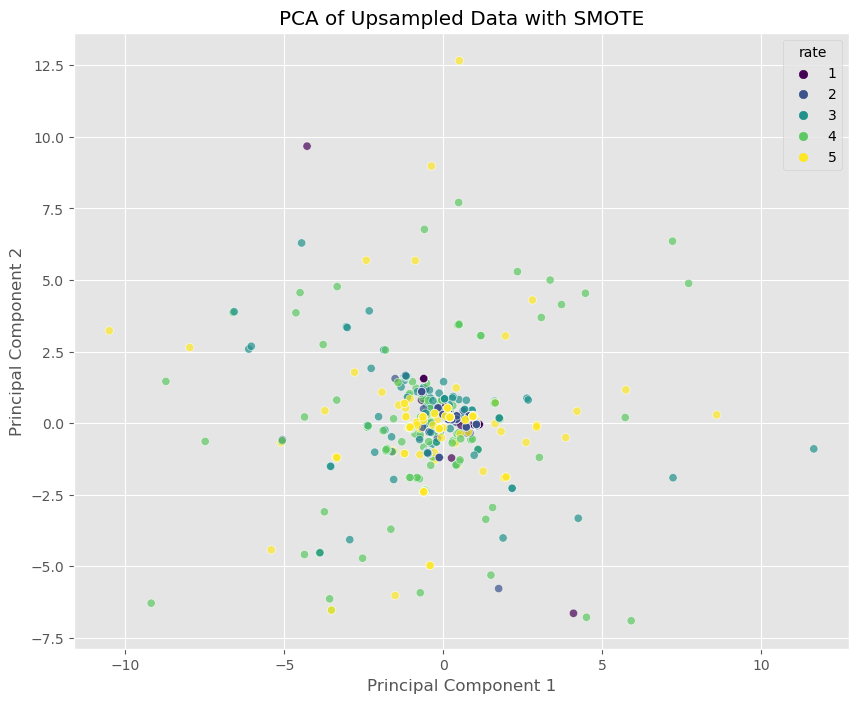

In [22]:
# Plot the PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='rate', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA of Upsampled Data with SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()